In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
url = "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt"
dataset = pd.read_csv(url, index_col=[0])

In [8]:
dataset.head(10)

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000
6,1127.886,11,12,4,2,2,148000
7,1352.040,5,7,3,2,1,58000
8,757.854,5,14,1,0,1,48000
9,1152.792,10,12,3,2,2,45000
10,1423.200,4,5,4,2,2,65000


In [9]:
dataset.shape

(645, 7)

In [11]:
dataset.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [13]:
dataset.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [14]:
dataset.isna().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [17]:
dataset = dataset.rename(columns={"Living.Room":"Living Room"})

In [18]:
dataset.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living Room', 'Bathroom',
       'Price'],
      dtype='object')

In [19]:
dataset["Sqft"].value_counts()

711.600     21
925.080     13
2134.800    11
889.500     10
1423.200    10
            ..
3024.300     1
4091.700     1
1440.990     1
1576.194     1
857.478      1
Name: Sqft, Length: 288, dtype: int64

In [20]:
dataset["Price"].value_counts()

45000     47
55000     29
36000     25
50000     22
100000    17
          ..
61000      1
72000      1
11900      1
28800      1
149999     1
Name: Price, Length: 153, dtype: int64

In [22]:
dataset.corr()

,Sqft,Floor,TotalFloor,Bedroom,Living Room,Bathroom,Price
Sqft,1.000000,0.143249,0.304515,0.615608,0.455940,0.728869,0.825514
Floor,0.143249,1.000000,0.564221,0.023986,-0.023563,0.099772,0.244553
TotalFloor,0.304515,0.564221,1.000000,0.067298,0.029373,0.146132,0.333631
Bedroom,0.615608,0.023986,0.067298,1.000000,0.526532,0.643083,0.467059
Living Room,0.455940,-0.023563,0.029373,0.526532,1.000000,0.546826,0.328788
Bathroom,0.728869,0.099772,0.146132,0.643083,0.546826,1.000000,0.605542
Price,0.825514,0.244553,0.333631,0.467059,0.328788,0.605542,1.000000


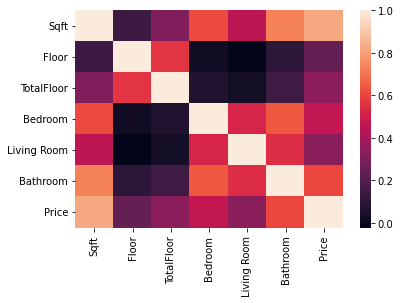

In [23]:
sns.heatmap(dataset.corr())

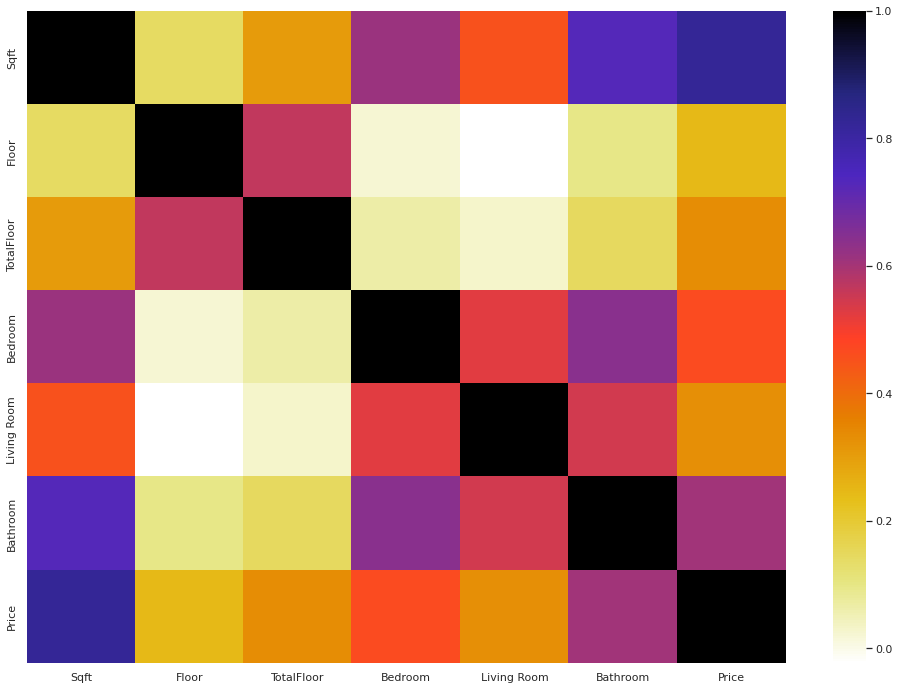

In [24]:
sns.set()
plt.figure(figsize=(17,12))
sns.heatmap(dataset.corr(), annot=False, cmap=plt.cm.CMRmap_r)
plt.show()

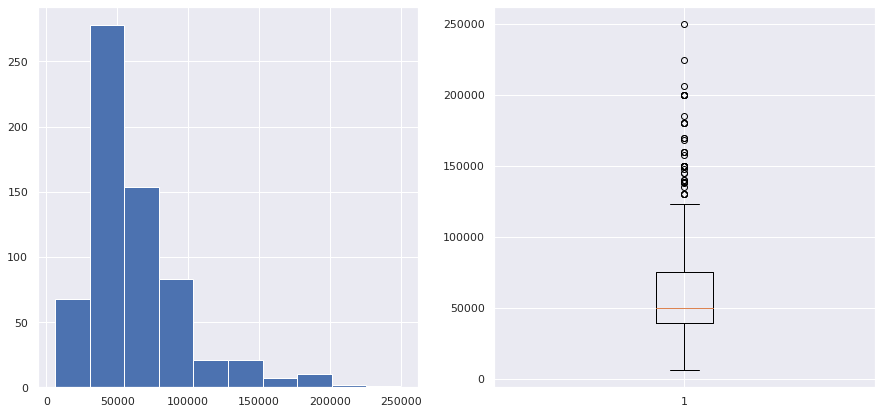

In [26]:
figs = plt.figure(figsize=(15,7))
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
x = data["Price"]
ax1.hist(x)
ax2.boxplot(x);

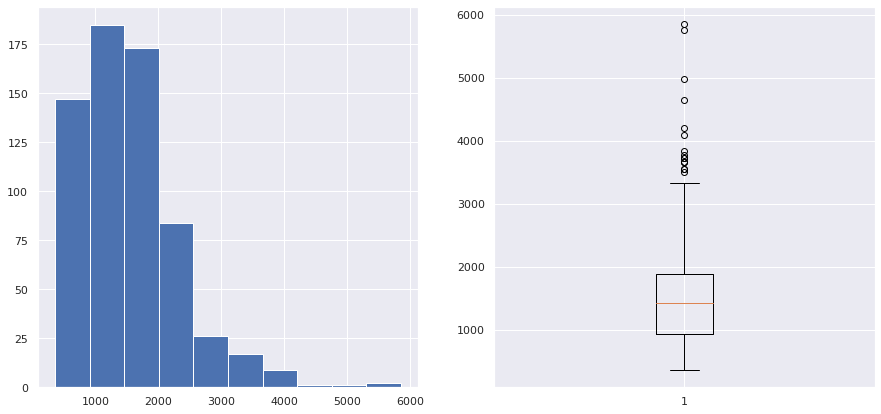

In [27]:
figs = plt.figure(figsize=(15,7))
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
x = data["Sqft"]
ax1.hist(x)
ax2.boxplot(x);

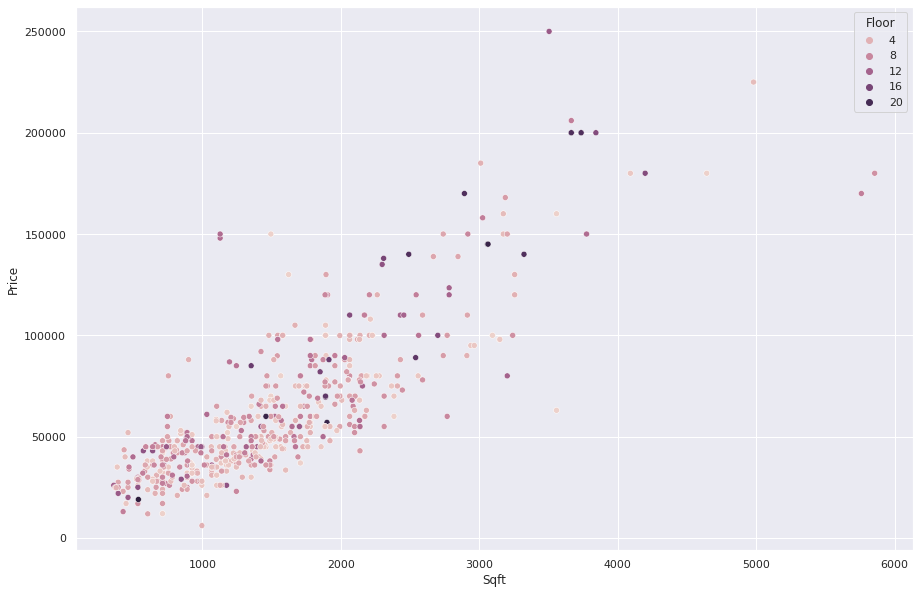

In [28]:
plt.figure(figsize = (15,10))
sns.scatterplot(data = data, x = data['Sqft'], y = data['Price'], hue = 'Floor')

In [30]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

pd.DataFrame(scaled_data).describe()

,0,1,2,3,4,5,6,7
count,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02
mean,3.167148e-16,4.372041e-17,1.056971e-17,-6.024466e-18,-1.684269e-16,1.984631e-16,9.191614e-17,-8.451465e-17
std,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00
min,-1.731929e+00,-1.523619e+00,-1.272516e+00,-1.974190e+00,-1.819099e+00,-3.926263e+00,-2.651152e+00,-1.569526e+00
25%,-8.610481e-01,-7.858412e-01,-7.572786e-01,-7.723470e-01,-8.289563e-01,4.026936e-01,-1.187117e+00,-6.455621e-01
50%,4.489630e-03,-1.362251e-01,-2.420416e-01,2.291886e-01,1.611860e-01,4.026936e-01,2.769182e-01,-3.366380e-01
75%,8.646845e-01,4.762700e-01,5.308140e-01,6.298029e-01,1.151328e+00,4.026936e-01,2.769182e-01,3.654621e-01
max,1.724879e+00,5.645358e+00,4.137473e+00,5.437174e+00,4.121755e+00,4.731650e+00,4.669023e+00,5.280163e+00


In [33]:
from sklearn.cluster import KMeans

In [34]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
kmeans.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
kmeans.inertia_

2793.9304248480594

In [36]:
sse = []
for k in range(1,20):
    
    kmeans = KMeans(n_jobs = -1,n_clusters = k,init = 'k-means++')
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

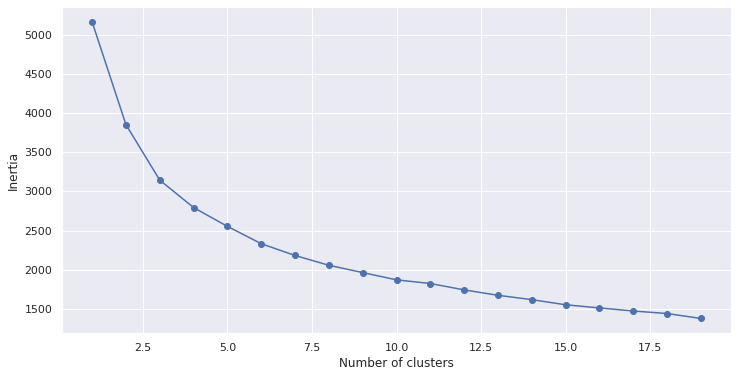

In [37]:
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':sse})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [38]:

kmeans = KMeans(n_jobs = -1, n_clusters = 6, init = 'k-means++')
kmeans.fit(scaled_data)
pred = kmeans.predict(scaled_data)

In [39]:

frame = pd.DataFrame(scaled_data)
frame['cluster'] = pred
frame['cluster'].value_counts()

5    157
1    129
4    120
0    110
2     92
3     37
Name: cluster, dtype: int64

In [40]:
kmeans = KMeans(n_jobs = -1, n_clusters = 8, init = 'k-means++')
kmeans.fit(scaled_data)
pred = kmeans.predict(scaled_data)

In [41]:
frame = pd.DataFrame(scaled_data)
frame['cluster'] = pred
frame['cluster'].value_counts()

7    118
3    114
1    110
5     83
4     77
6     64
0     52
2     27
Name: cluster, dtype: int64